## 1. Importing the packages and libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')

import nltk
from nltk import sent_tokenize,word_tokenize

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn import metrics


## 2. Import and read the datasets

In [2]:
# loading the data from csv file to a pandas Dataframe

df = pd.read_csv(r'C:\Users\HARITHA\Desktop\Spam mail detection\sms_data.csv')

In [3]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


## 3. Data Cleaning

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [5]:
df.shape

(5572, 2)

In [6]:
# renaming the columns

df.rename(columns={'v1':'Category','v2':'Message'},inplace=True)

In [7]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
df.describe()

,Category,Message
count,5572,5572
unique,2,5157
top,ham,"Sorry, I'll call later"
freq,4825,30


In [9]:
# Label Encoding

df['Category'].replace({'ham':0,'spam':1},inplace=True)

In [10]:
df.head()

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
# missing values

df.isnull().sum()

Category    0
Message     0
dtype: int64

In [12]:
# check for duplicate values

df.duplicated().sum()

415

In [13]:
# remove duplicates

df=df.drop_duplicates(keep='first')

In [14]:
df.duplicated().sum()

0

In [15]:
df.shape

(5157, 2)

## 4. Exploratory Data Analysis (EDA)

In [16]:
df.head()

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [17]:
df['Category'].value_counts()

Category
0    4516
1     641
Name: count, dtype: int64

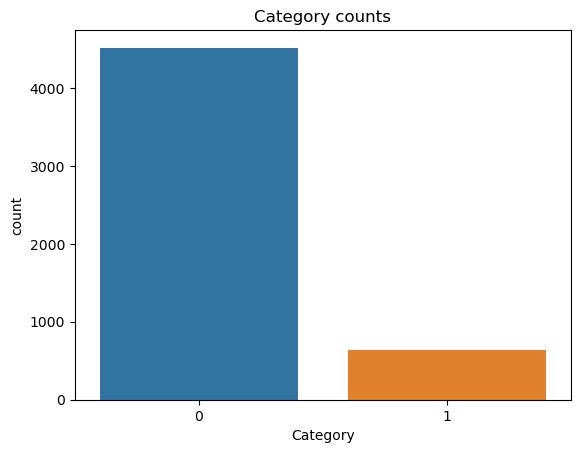

In [18]:
sns.countplot(data=df,x='Category')
plt.title("Category counts")
plt.show()

In [19]:
# large number of ham and very less spam so out data is not balanced

In [20]:
df['Num_of_characters'] = df['Message'].apply(len)

In [21]:
df.head()

,Category,Message,Num_of_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [22]:
df['Num_of_words']=df['Message'].apply(lambda x:len(nltk.word_tokenize(x)))

In [23]:
df.head()

,Category,Message,Num_of_characters,Num_of_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [24]:
df['Num_of_sentences']=df['Message'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [25]:
df.head()

,Category,Message,Num_of_characters,Num_of_words,Num_of_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [26]:
df[['Num_of_characters','Num_of_words','Num_of_sentences']].describe()

,Num_of_characters,Num_of_words,Num_of_sentences
count,5157.000000,5157.000000,5157.000000
mean,79.103936,18.560403,1.969750
std,58.382922,13.405970,1.455526
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,61.000000,15.000000,1.000000
75%,118.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [27]:
df.query('Category == 0')[['Num_of_characters','Num_of_words','Num_of_sentences']].describe()

,Num_of_characters,Num_of_words,Num_of_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.869353,17.267715,1.827724
std,56.708301,13.588065,1.394338
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,53.000000,13.000000,1.000000
75%,91.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [28]:
df.query('Category == 1')[['Num_of_characters','Num_of_words','Num_of_sentences']].describe()

,Num_of_characters,Num_of_words,Num_of_sentences
count,641.000000,641.000000,641.000000
mean,137.118565,27.667707,2.970359
std,30.399707,7.103501,1.485575
min,7.000000,2.000000,1.000000
25%,130.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,9.000000


<Axes: xlabel='Num_of_characters', ylabel='Count'>

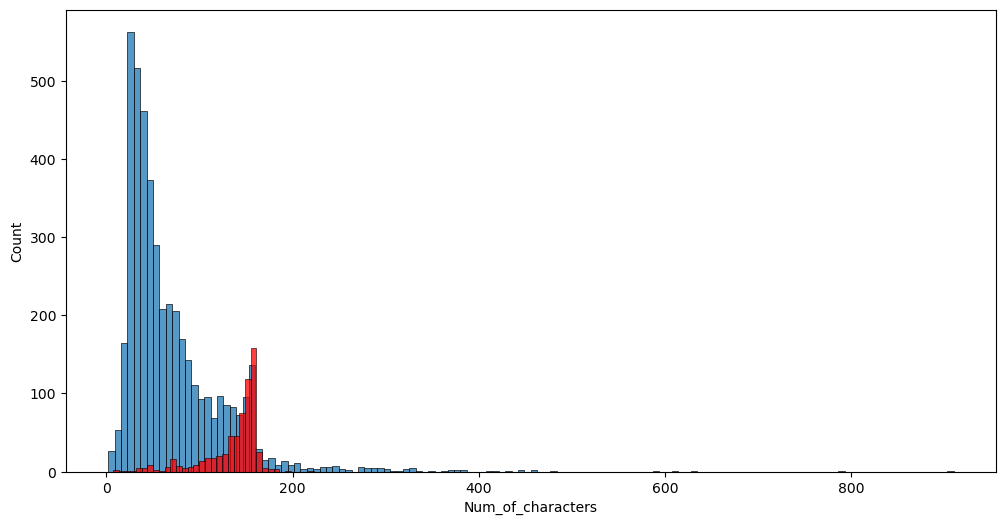

In [29]:
plt.figure(figsize=(12,6))
sns.histplot(data=df.query('Category == 0')['Num_of_characters'])
sns.histplot(data=df.query('Category == 1')['Num_of_characters'],color='red')

<Axes: xlabel='Num_of_words', ylabel='Count'>

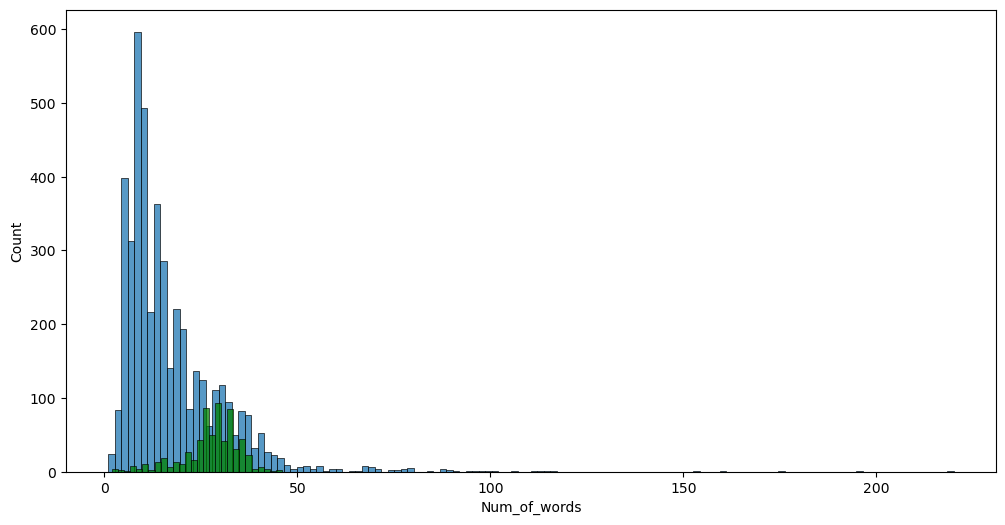

In [30]:
plt.figure(figsize=(12,6))
sns.histplot(data=df.query('Category == 0')['Num_of_words'])
sns.histplot(data=df.query('Category == 1')['Num_of_words'],color='green')

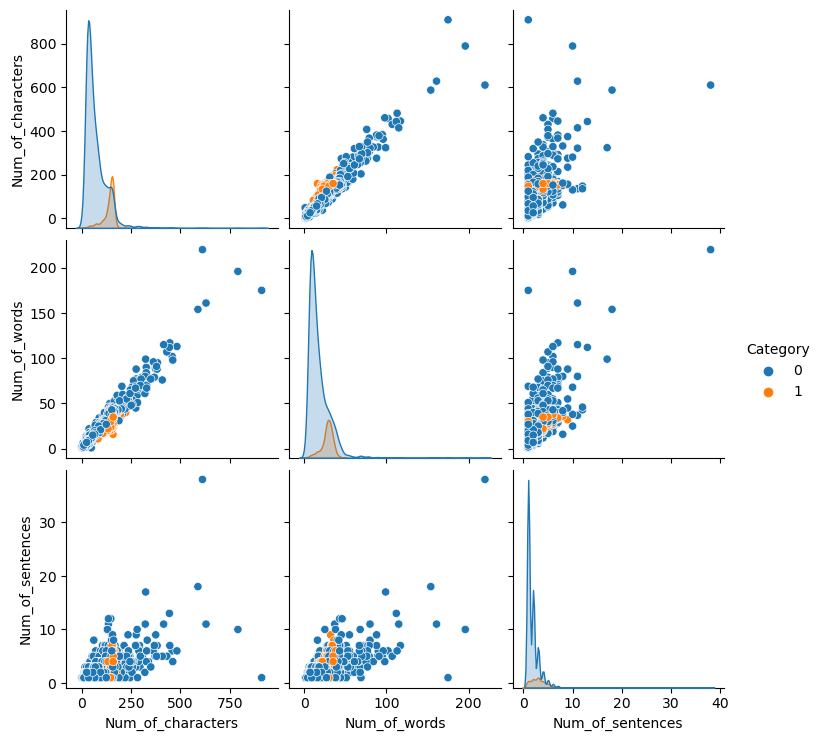

In [31]:
sns.pairplot(df,hue='Category')

<Axes: >

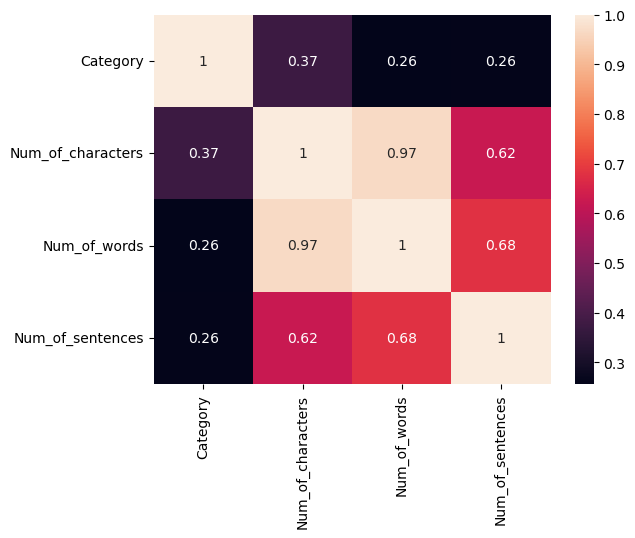

In [32]:
sns.heatmap(df[['Category','Num_of_characters','Num_of_words','Num_of_sentences']].corr(),annot=True)

## 5. Data Preprocessing
- Lower case
- Tokenization
- Removing special characters
- Removing stop word and punctuation

In [33]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string

In [34]:
ps = PorterStemmer()

def trans_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
            
    text=y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text=y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
        
    return " ".join(y)

transformed_text=trans_text("Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...")
print(transformed_text)

go jurong point crazi avail bugi n great world la e buffet cine got amor wat


In [36]:
df['Message'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [37]:
ps.stem('walking')

'walk'

In [38]:
df['transformed_Message']=df['Message'].apply(trans_text)

In [39]:
df.head()

,Category,Message,Num_of_characters,Num_of_words,Num_of_sentences,transformed_Message
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [40]:
spam_corpus = []
for msg in df[df['Category']==1]['transformed_Message'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [41]:
len(spam_corpus)

9781

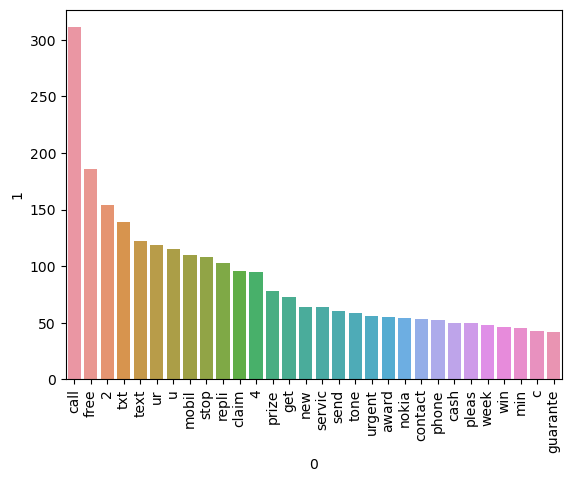

In [42]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation=90)
plt.show()

In [43]:
ham_corpus = []
for msg in df[df['Category']==0]['transformed_Message'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [44]:
len(ham_corpus)

35940

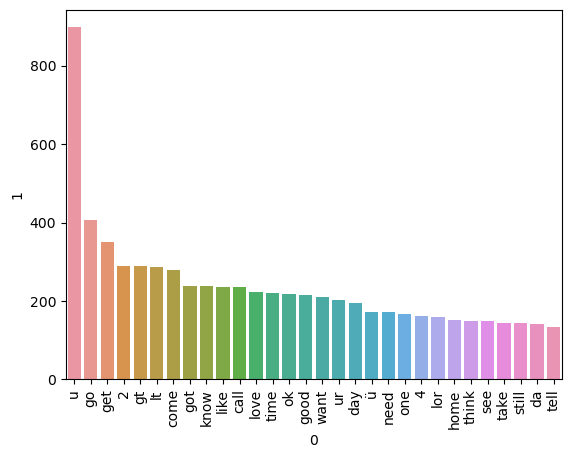

In [45]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0],y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation=90)
plt.show()

## 6. Model building

In [46]:
xx=df['transformed_Message']
yy=df['Category']

In [47]:
xx

0       go jurong point crazi avail bugi n great world...
1                                   ok lar joke wif u oni
2       free entri 2 wkli comp win fa cup final tkt 21...
3                     u dun say earli hor u c alreadi say
4                    nah think goe usf live around though
                              ...                        
5567    2nd time tri 2 contact u pound prize 2 claim e...
5568                              ü b go esplanad fr home
5569                                    piti mood suggest
5570    guy bitch act like interest buy someth els nex...
5571                                       rofl true name
Name: transformed_Message, Length: 5157, dtype: object

In [48]:
yy

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: Category, Length: 5157, dtype: int64

In [49]:
#splitting our training data again in train and test data
X_train,X_test,Y_train,Y_test=train_test_split(xx,yy,test_size=0.3,random_state=45)

In [50]:
print(xx.shape)
print(X_train.shape)
print(X_test.shape)

(5157,)
(3609,)
(1548,)


In [51]:
# transform the text data to feature vectors that can be used as input to the Logistic regression
feature_extraction = TfidfVectorizer(min_df = 1, stop_words='english', lowercase=True)

X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)

# convert Y_train and Y_test values as integers

Y_train = Y_train.astype('int')
Y_test = Y_test.astype('int')

In [52]:
print(X_train)

2175                                          see thought
1258                                         also cbe pay
3692                        sir wait call free pleas call
3061                         k k tomorrow onward start ah
5343               go open room thanksgiv without upcharg
                              ...                        
4800                                 dont know get messag
591     ur chanc win wkli shop spree txt shop c custca...
165     bangbab ur order way u receiv servic msg 2 dow...
5056    train back northampton afraid stay skyve today...
3850                                          u town alon
Name: transformed_Message, Length: 3609, dtype: object


In [53]:
print(X_train_features)

  (0, 4831)	1.0
  (1, 3616)	0.6047594144000737
  (1, 1202)	0.7964082186256491
  (2, 3703)	0.46160231420465947
  (2, 2122)	0.42670350870532536
  (2, 5176)	0.47840123886868646
  (2, 4343)	0.6131718142807716
  (3, 611)	0.47903205115888786
  (3, 4538)	0.42671223396025737
  (3, 3504)	0.6490880339738163
  (3, 4899)	0.40881497954840285
  (4, 5066)	0.5885204123419323
  (4, 4791)	0.5405189882103567
  (4, 4095)	0.4136101259020885
  (4, 3510)	0.4363594978824143
  (5, 4859)	1.0
  (6, 5191)	0.513716656550795
  (6, 906)	0.43743569364580465
  (6, 3313)	0.3501567685274789
  (6, 5187)	0.3693898789999972
  (6, 5014)	0.5344965532663867
  (7, 213)	0.231970555621085
  (7, 237)	0.3100474415358422
  (7, 2503)	0.3100474415358422
  (7, 382)	0.3100474415358422
  :	:
  (3606, 3526)	0.23592222596352788
  (3606, 2281)	0.27299412216674324
  (3606, 1416)	0.24147248842638677
  (3606, 4991)	0.22893155397883402
  (3606, 5206)	0.17695940722770193
  (3606, 3229)	0.17548959350973
  (3606, 3277)	0.18412912202871495
  (3606

In [54]:
model = LogisticRegression()

In [55]:
model.fit(X_train_features, Y_train)

LogisticRegression()

In [56]:
# prediction on training data
prediction_on_training_data = model.predict(X_train_features)
accuracy_on_training_data = accuracy_score(Y_train, prediction_on_training_data)

In [57]:
print('Accuracy on training data : ', accuracy_on_training_data)

Accuracy on training data :  0.9584372402327515


In [58]:
# prediction on test data

prediction_on_test_data = model.predict(X_test_features)
accuracy_on_test_data = accuracy_score(Y_test, prediction_on_test_data)

In [59]:
print('Accuracy on test data : ', accuracy_on_test_data)

Accuracy on test data :  0.9593023255813954


In [60]:
metrics.confusion_matrix(Y_test, prediction_on_test_data)

array([[1350,    2],
       [  61,  135]], dtype=int64)

In [61]:
print(metrics.classification_report(Y_test, prediction_on_test_data))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1352
           1       0.99      0.69      0.81       196

    accuracy                           0.96      1548
   macro avg       0.97      0.84      0.89      1548
weighted avg       0.96      0.96      0.96      1548



In [62]:
input_mail = ["Will ü b going to esplanade fr home?"]

# convert text to feature vectors
input_data_features = feature_extraction.transform(input_mail)

# making prediction

prediction = model.predict(input_data_features)
print(prediction)


if (prediction[0]==0):
  print('Ham mail')

else:
  print('Spam mail')

[0]
Ham mail
